## Team 2413:
- Maryam Gholami Shiri (2013071)
- Muhammad Usama Qasim (2040472)
- Laura Schulze (2122311)
- Savina Tsichli (10738280)

# Exercise 3: XGBoost

Study the data in the file x_XGB_24.dat (N=2000 samples) with labels y_XGB_24.dat. The dataset should be split into N’ training samples and N’’ validation samples, with N’+N’’=N. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost 
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

mycmap = "winter"
mpl.rcParams['image.cmap'] = mycmap
plt.rcParams['font.size'] = 13

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

C:\Users\Farnoosh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


XGBoost version: 2.0.3


In [2]:
np.random.seed(12345)

dname="./DATA/"
str0="_XGB_24.dat"
fnamex=dname+'x'+str0
fnamey=dname+'y'+str0
x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
y = np.loadtxt(fnamey)
y = y.astype(int)
N,L = len(x), len(x[0])

N_train = int(0.75*N)
x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]
print(f"N={N}, N_train={N_train}, L={L}")

N=4000, N_train=3000, L=4


[-31.608 -29.544   6.773   9.554] 0
[46.451 15.318 24.891 15.357] 1
[ 24.771  46.131 -49.161 -39.356] 1
[-20.13   15.641  30.981  37.218] 1
[46.465 22.369 14.248 21.745] 1


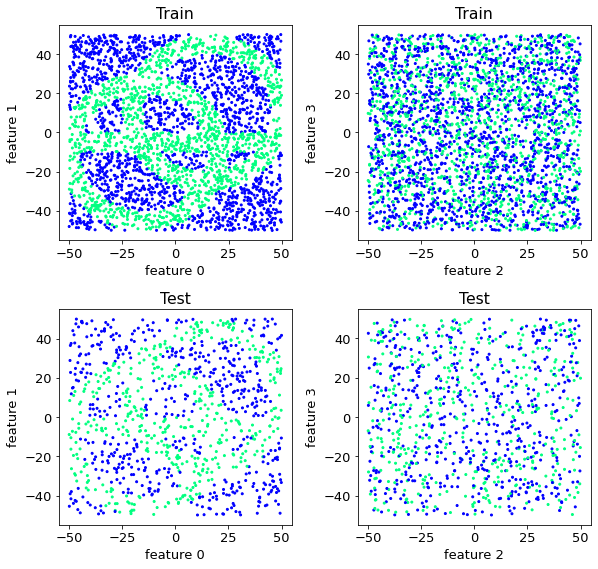

In [3]:
def scat(ax,x,y,i=0,j=1,s=4,title=""):
    ax.scatter(x[:,i],x[:,j],s=s,c=y)
    ax.set_xlabel(f"feature {i}")
    ax.set_ylabel(f"feature {j}")
    ax.set_title(title)

for n in range(5):
    print(x[n],y[n])

fig,AX = plt.subplots(2,2,figsize=(8.5,8.1))
scat(AX[0,0],x_train,y_train,title="Train")
scat(AX[0,1],x_train,y_train,i=2,j=3,title="Train")
scat(AX[1,0],x_test,y_test,title="Test")
scat(AX[1,1],x_test,y_test,i=2,j=3,title="Test")
fig.tight_layout()
plt.show()

## 3.1 Model complexity, parameters’ and regularization
Try different parameters (λ, γ, n_estimators, …). Which is the simplest yet effective XGBoost model that keeps a good validation accuracy? Is regularization useful for this analysis?

In [30]:
# Parameters
n_estimators_range = range(10, 201, 10)
reg_lambda_values = [0, 0.001, 0.01, 0.1, 1, 10, 100]
gamma_values = [0, 0.001, 0.01, 0.1, 1, 10, 100]

# Lists to store results
accuracies_n_estimators = []
accuracies_lambda = []
accuracies_gamma = []

# Loop over vary values
for n_estimators in n_estimators_range:
    model = XGBClassifier(seed=1, objective='binary:logistic', n_estimators=n_estimators, use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)
    accuracies_n_estimators.append(accuracy_score(y_test, model.predict(x_test)))

for reg_lambda in reg_lambda_values:
    model = XGBClassifier(seed=1, objective='binary:logistic', reg_lambda=reg_lambda, use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)
    accuracies_lambda.append(accuracy_score(y_test, model.predict(x_test)))

for gamma in gamma_values:
    model = XGBClassifier(seed=1, objective='binary:logistic', gamma=gamma, use_label_encoder=False, eval_metric='logloss')
    model.fit(x_train, y_train)
    accuracies_gamma.append(accuracy_score(y_test, model.predict(x_test)))

# Finding and printing the max values and corresponding parameters
max_accuracy_lambda = max(accuracies_lambda)
max_lambda = reg_lambda_values[accuracies_lambda.index(max_accuracy_lambda)]
print(f"Maximum accuracy: {max_accuracy_lambda:.3f} at reg_lambda={max_lambda}")

max_accuracy_gamma = max(accuracies_gamma)
max_gamma = gamma_values[accuracies_gamma.index(max_accuracy_gamma)]
print(f"Maximum accuracy: {max_accuracy_gamma:.3f} at gamma={max_gamma}")

max_accuracy_n_estimators = max(accuracies_n_estimators)
max_n_estimators = n_estimators_range[accuracies_n_estimators.index(max_accuracy_n_estimators)]
print(f"Maximum accuracy : {max_accuracy_n_estimators:.3f} at n_estimators={max_n_estimators}")    

Maximum accuracy with λ: 0.950 at reg_lambda=0
Maximum accuracy with γ: 0.948 at gamma=0
Maximum accuracy: 0.949 achieved with n_estimators: 170


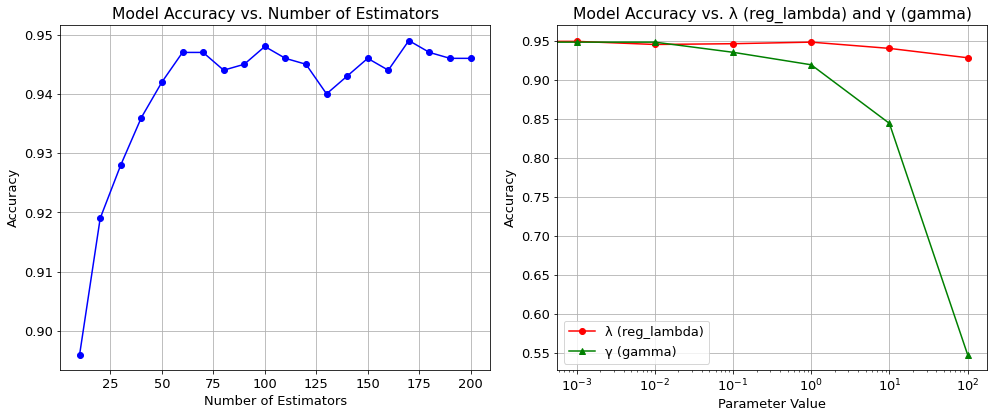

In [23]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the number of estimators on the first subplot
axs[0].plot(n_estimators_range, accuracies, marker='o', linestyle='-', color='b')
axs[0].set_title('Model Accuracy vs. Number of Estimators')
axs[0].set_xlabel('Number of Estimators')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True)

# Plot for varying λ (reg_lambda) and γ (gamma) on the second subplot
axs[1].plot(reg_lambda_values, accuracies_lambda, marker='o', linestyle='-', color='r', label='λ (reg_lambda)')
axs[1].plot(gamma_values, accuracies_gamma, marker='^', linestyle='-', color='g', label='γ (gamma)')
axs[1].set_title('Model Accuracy vs. λ (reg_lambda) and γ (gamma)')
axs[1].set_xlabel('Parameter Value')
axs[1].set_ylabel('Accuracy')
axs[1].set_xscale('log')  # Use log scale if appropriate
axs[1].legend()
axs[1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## 3.2 Dimensionality reduction
Consider reduced data samples with L’<L features. For example, feature 0,1, and 3 out of the L=4 features. Check if the exclusion of the least important feature(s) from training data leads to better accuracy

## 3.3 XGBoost vs NN
Compare the validation accuracy of XGBoost with that of a simple feed-forward neural network (NN) 
* By varying the number of data samples N’ in the training set (i.e., reducing the fraction N’/N of the data set used for training) 
* With cross-validation for all cases.
  
Is the NN or the XGB performing significantly better at low N’?

**Cross-validation** collects the statistics from multiple realizations of training and validation, each performed for a different
selection of the training set. For example, one can leave out a given block [0,1,2,…, N’’-1] of data samples for validation
and train on the remaining samples. The procedure is iterated for the next block [N’’,…, 2N’’-1], etc., so that, in total, N/N’’
independent training and validations are performed with the same full dataset. Another possibility is randomly picking the
validation samples. As a result of cross-validation, one gets an error estimate for the accuracy of the model.